In [54]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [112]:
from polire.random.random import Random
from polire.trend.trend import Trend
from polire.spline.bspline import BSpline
from polire.gp.gp import GaussianProcess
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import colors
import seaborn as sns
import sys

In [117]:
df = pd.read_csv("../../daily_44201_2018.csv")

In [118]:
df.head(3)

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,21,NaN,-,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2019-02-12
1,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,30,NaN,-,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2019-02-12
2,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,41,NaN,-,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2019-02-12


In [119]:
some_value = 'Ozone'
df = df.loc[df['Parameter Name'] == some_value]

some_value = '2018-05-07'
df = df.loc[df['Date Local'] == some_value]

df = df.sample(frac=1)
df.shape

(1240, 29)

In [120]:
df_train, df_test = train_test_split(df, test_size=0.2)
df_train.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
398059,56,35,101,44201,1,42.869824,-109.870760,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,74,NaN,-,Pinedale Gaseous,Pinedale Gaseous Monitor on west side of City ...,Wyoming,Sublette,Not in a city,NaN,2019-03-12
45071,6,37,4006,44201,1,33.802500,-118.220000,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,37,NaN,-,Long Beach (Hudson),"2425 Webster St., Long Beach, CA",California,Los Angeles,Long Beach,"Los Angeles-Long Beach-Anaheim, CA",2019-04-02
361708,48,453,20,44201,1,30.483168,-97.872301,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,100,NaN,-,Austin Audubon Society,12200 Lime Creek Rd,Texas,Travis,Leander,"Austin-Round Rock, TX",2019-02-18
380287,53,53,12,44201,1,46.784100,-121.740367,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,40,NaN,-,MT RAINIER - JACKSON VISITIORS CENTER,"JACKSON VISITOR'S CENTER MT RAINIER, WA",Washington,Pierce,Not in a city,"Seattle-Tacoma-Bellevue, WA",2019-04-16
300337,40,143,174,44201,1,35.953708,-96.004975,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,84,NaN,-,TULSA SOUTH,502 EAST 144TH. PL.,Oklahoma,Tulsa,Glenpool,"Tulsa, OK",2019-01-15


In [121]:
df.columns

Index(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Sample Duration',
       'Pollutant Standard', 'Date Local', 'Units of Measure', 'Event Type',
       'Observation Count', 'Observation Percent', 'Arithmetic Mean',
       '1st Max Value', '1st Max Hour', 'AQI', 'Method Code', 'Method Name',
       'Local Site Name', 'Address', 'State Name', 'County Name', 'City Name',
       'CBSA Name', 'Date of Last Change'],
      dtype='object')

In [122]:
r = Random(resolution='standard')
trainX = df_train[['Longitude', 'Latitude']].values
trainy = df_train['Arithmetic Mean'].values
r.fit(trainX, trainy)

In [123]:
testX = df_test[['Longitude', 'Latitude']].values
testy = df_test['Arithmetic Mean'].values

In [124]:
x1max, x2max = np.max(trainX, axis=0)
print (x1max, x2max)
x1min, x2min = np.min(trainX, axis=0)

-66.126531 64.84568999999999


In [125]:
x1min, x1max, x2min, x2max

(-157.871171, -66.126531, 18.440774, 64.84568999999999)

In [126]:
lss = [Random(), BSpline(kx=2, ky=2), Trend(order=2), GaussianProcess()]

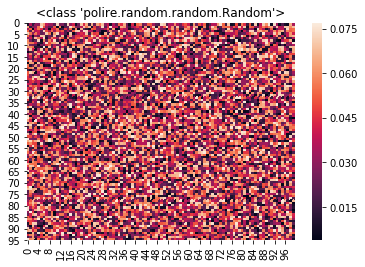

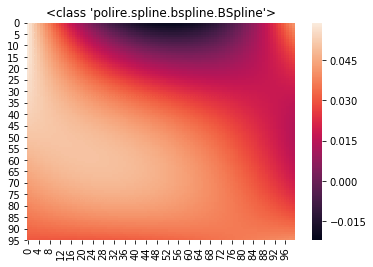

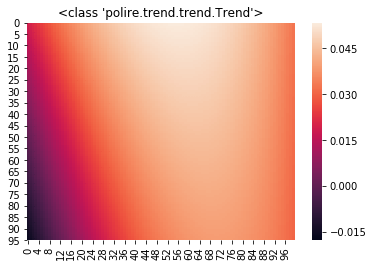

/home/apoorv/Desktop/github/spatial-interpolation/.env/lib/python3.6/site-packages/scikit_learn-0.21.2-py3.6-linux-x86_64.egg/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.62237328]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 53, 'nit': 4, 'warnflag': 2}
  ConvergenceWarning)


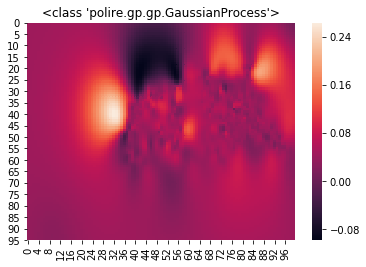

In [127]:
for r in lss:
    r.fit(trainX, trainy)
#     try:
    Z = r.predict_grid((x1min, x1max), (x2min, x2max)).reshape(100, 100)
    sns.heatmap(Z)
    plt.title(r.__class__)
    plt.show()
    plt.close()
#     except:
#         print (f"Was not able to. for {r.__class__}!")


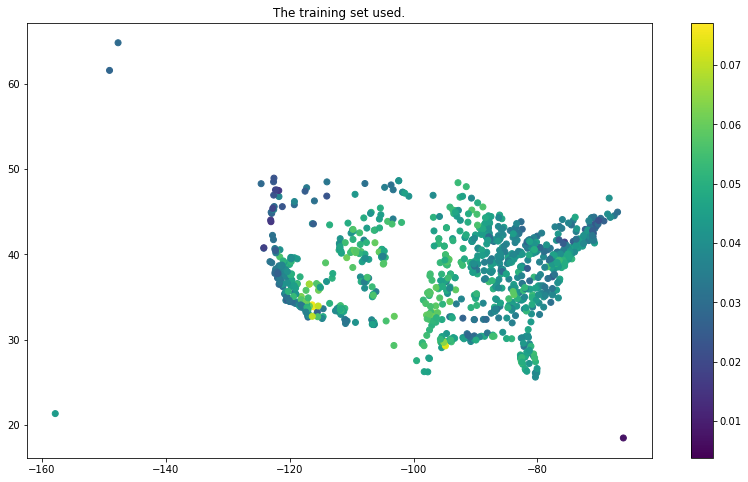

In [128]:
plt.figure(figsize=(14, 8))
h = plt.scatter(trainX[:, 0], trainX[:, 1], c = trainy)
plt.title("The training set used.")
plt.colorbar(h)

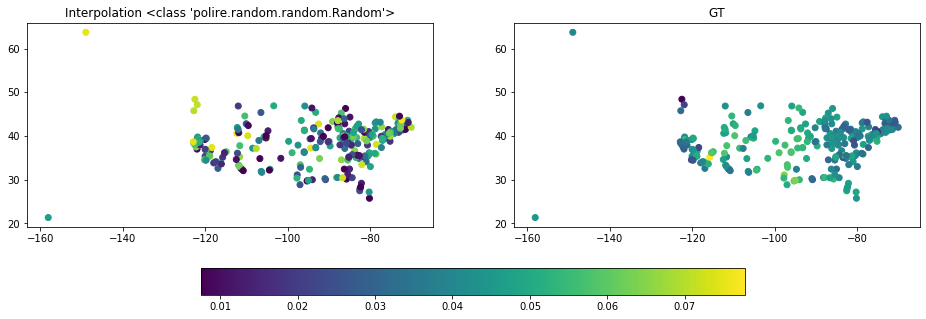

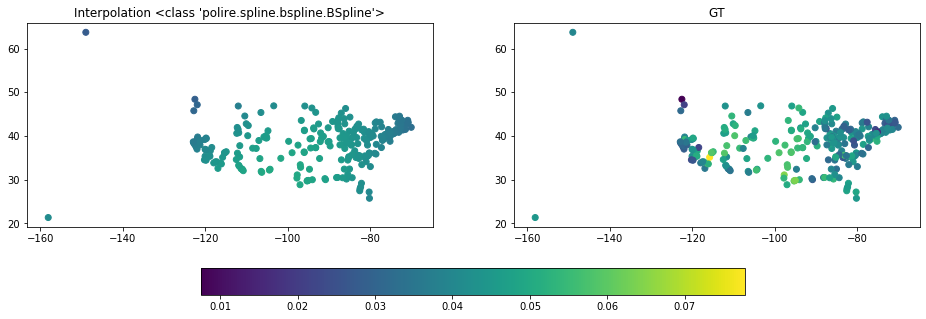

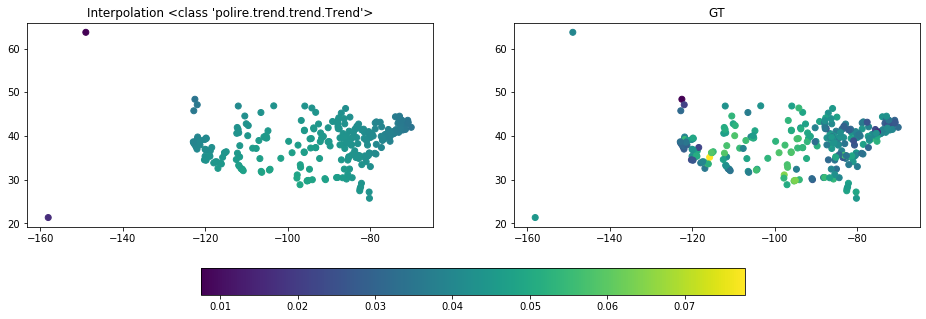

/home/apoorv/Desktop/github/spatial-interpolation/.env/lib/python3.6/site-packages/scikit_learn-0.21.2-py3.6-linux-x86_64.egg/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.62237328]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 53, 'nit': 4, 'warnflag': 2}
  ConvergenceWarning)


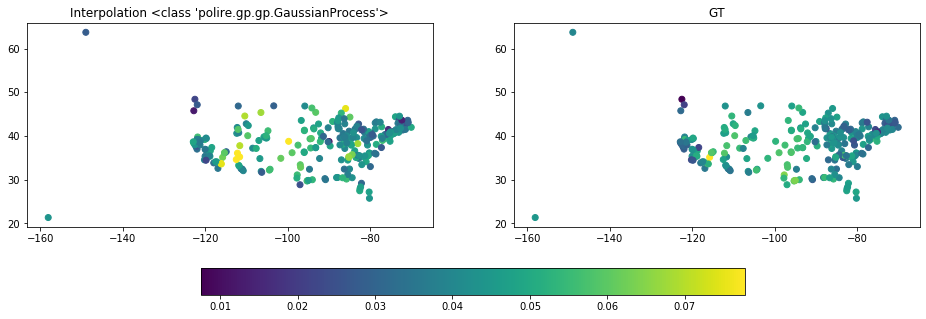

In [129]:
for r in lss:
    r.fit(trainX, trainy)
    try:
        fig, ax = plt.subplots(ncols=2, sharex=True, figsize=(16, 5))
        pred_y = r.predict(testX)
        vmin = min(testy)
        vmax = max(testy)
        norm = colors.Normalize(vmin=vmin, vmax=vmax)
        inter = ax[0].scatter(testX[:, 0], testX[:, 1], c = pred_y)
        ax[0].set_title(f"Interpolation {r.__class__}")
        gt = ax[1].scatter(testX[:, 0], testX[:, 1], c = testy)
        
        # normalize colorbar
        inter.set_norm(norm)
        gt.set_norm(norm)
        fig.colorbar(gt, ax=ax, orientation='horizontal', fraction=.1)
        
        ax[1].set_title("GT")
        plt.show()
        
    except NotImplementedError as e:
        print (f"Was not able to. for {r.__class__}!")
        print(str(e))

In [130]:
type(testX[:, 0])

numpy.ndarray

In [131]:
r.predict

<bound method Base.predict of <polire.gp.gp.GaussianProcess object at 0x7f5e55c5c198>>

In [132]:
lims = 1, 3, 3, 5
resolution = 12
x1min, x1max, x2min, x2max = lims
x1 = np.linspace(x1min, x1max, resolution)
x2 = np.linspace(x2min, x2max, resolution)
X1, X2 = np.meshgrid(x1, x2)